# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import seaborn as sns
import urllib

# Import API key
from api_keys import api_key
import api_keys
# Incorporated citipy to determine city based on latitude and longitude

from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

606

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [ ]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

# url = "http://api.openweathermap.org/data/2.5/forecast?id=524901&APPID=" + api_key
# print(url)

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
 # Create empty lists to append the API data into lists 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Start the call counter 
record = 1

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities in the city list 
for city in cities:  
    
# Try statement to append calls where value is found 
# Not all calls return data as OpenWeatherMap will not have have records in all the cities generated by CityPy module
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
        
# Increase counter by one 
        record= record + 1
        
# Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)
        
# If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue
    


Beginning Data Retrieval
-------------------------------
Processing Record 1 | Victoria
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=victoria
Processing Record 2 | Ushuaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=ushuaia
Processing Record 3 | Sabang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=sabang
Processing Record 4 | Cidreira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=cidreira
Processing Record 5 | Vestmannaeyjar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=vestmannaeyjar
Processing Record 6 | Torbay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=torbay
Processing Record 7 | Dolinsk
http://api.openweathermap.org/data/2.5/weather?units=

Processing Record 57 | Pakxe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=pakxe
Processing Record 58 | Ostrovnoy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=ostrovnoy
Processing Record 59 | Georgetown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=georgetown
Processing Record 60 | Obo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=obo
Processing Record 61 | Murgab
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=murgab
Processing Record 62 | Paamiut
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=paamiut
Processing Record 63 | Xining
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=xining
City not fou

City not found. Skipping...
Processing Record 112 | Guasdualito
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=guasdualito
Processing Record 113 | La Fria
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=la fria
Processing Record 114 | Hokitika
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=hokitika
Processing Record 115 | Pelym
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=pelym
Processing Record 116 | Atuona
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=atuona
Processing Record 117 | Hillsboro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=hillsboro
Processing Record 118 | Laguna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78

Processing Record 169 | Gizo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=gizo
City not found. Skipping...
Processing Record 170 | Beausejour
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=beausejour
Processing Record 171 | Erzincan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=erzincan
Processing Record 172 | Awbari
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=awbari
Processing Record 173 | Lorengau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=lorengau
Processing Record 174 | Norman Wells
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=norman wells
Processing Record 175 | Zhanaozen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=

Processing Record 224 | Hunterville
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=hunterville
Processing Record 225 | Vardo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=vardo
Processing Record 226 | Hay River
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=hay river
Processing Record 227 | Kamaishi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=kamaishi
Processing Record 228 | Faya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=faya
Processing Record 229 | Sinnamary
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=sinnamary
Processing Record 230 | Tsaratanana
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec69

Processing Record 279 | Yumen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=yumen
City not found. Skipping...
Processing Record 280 | Bontang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=bontang
Processing Record 281 | San Carlos de Bariloche
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=san carlos de bariloche
Processing Record 282 | Vila Velha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=vila velha
Processing Record 283 | Adrar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=adrar
Processing Record 284 | Luanda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=luanda
City not found. Skipping...
Processing Record 285 | Aneho
http://api.openweathermap.or

Processing Record 334 | Coolum Beach
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=coolum beach
Processing Record 335 | Atambua
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=atambua
Processing Record 336 | Coihaique
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=coihaique
Processing Record 337 | Wladyslawowo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=wladyslawowo
Processing Record 338 | Tautira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=tautira
Processing Record 339 | Buraydah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=buraydah
Processing Record 340 | Quatre Cocos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c

Processing Record 389 | Keuruu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=keuruu
Processing Record 390 | Uddevalla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=uddevalla
Processing Record 391 | Nyaunglebin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=nyaunglebin
Processing Record 392 | Sovetskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=sovetskiy
Processing Record 393 | Tchollire
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=tchollire
Processing Record 394 | Bathsheba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=bathsheba
Processing Record 395 | Waipawa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c3

Processing Record 445 | Ailigandi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=ailigandi
Processing Record 446 | Mastic Beach
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=mastic beach
Processing Record 447 | Lukovetskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=lukovetskiy
Processing Record 448 | Noyabrsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=noyabrsk
City not found. Skipping...
Processing Record 449 | Emba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=emba
Processing Record 450 | Boende
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=boende
Processing Record 451 | Makakilo City
http://api.openweathermap.org/data/2.5/weather?units=Imperia

Processing Record 500 | Jiangyou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=jiangyou
Processing Record 501 | Pathein
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=pathein
Processing Record 502 | Sapa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=sapa
Processing Record 503 | Eagle Pass
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=eagle pass
City not found. Skipping...
Processing Record 504 | Ryotsu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=ryotsu
Processing Record 505 | Amboise
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=amboise
Processing Record 506 | Dutlwe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [6]:
weather_data_dict = {
    "City Name": city_name, 
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Wind Speed": wind_speed
}
                   
# Create a data frame from dictionary
weather_data = pd.DataFrame(weather_data_dict)

# Display count of weather data values 
weather_data.count()

City Name     541
Cloudiness    541
Country       541
Date          541
Humidity      541
Lat           541
Lng           541
Max Temp      541
Wind Speed    541
dtype: int64

In [7]:
#Save weather data to csv
weather_data.to_csv('../PythonAPI/weather_data.csv')

weather_data.head()

,City Name,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Victoria,75,BN,1562720709,94,5.28,115.24,75.20,1.12
1,Ushuaia,40,AR,1562720626,93,-54.81,-68.31,35.60,4.97
2,Sabang,23,PH,1562720712,74,13.80,121.11,82.13,4.47
3,Cidreira,24,BR,1562720713,91,-30.17,-50.22,53.51,4.56
4,Vestmannaeyjar,94,IS,1562720714,72,63.44,-20.27,52.97,15.50


#### Latitude vs. Temperature Plot

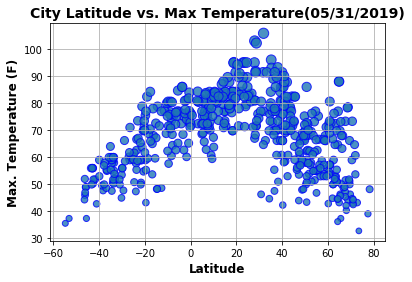

In [13]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s = max_temp*10, edgecolor="blue", alpha=0.8, linewidth=1.0)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature(05/31/2019)", weight='semibold',fontsize=14)
plt.xlabel("Latitude", weight='semibold',fontsize=12)
plt.ylabel("Max. Temperature (F)", weight='semibold',fontsize=12)
plt.grid(True)

plt.savefig('../PythonAPI/Max_Temp vs. Latitude.png', dpi=150)


plt.show()



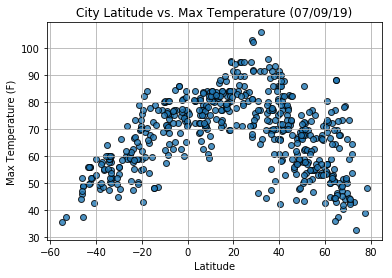

In [14]:

# Build scatter plot for latitude vs temperature
plt.scatter(weather_data["Lat"], weather_data["Max Temp"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
# plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

In [ ]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Latitude"], weather_data["Humidity"], marker="o", s= humidity*10, edgecolor="blue", alpha=0.75, linewidth=1.0)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity(05/31/2019)", weight='semibold',fontsize=14)
plt.xlabel("Latitude", weight='semibold',fontsize=12)
plt.ylabel("Humidity (%)", weight='semibold',fontsize=12)
plt.grid()

# Save the figure
plt.savefig('../PythonAPI/City Latitude vs. Humidity.png', dpi=150)

#Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

In [ ]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Latitude"], weather_data["Cloudiness"], marker="o", s= lat*10, edgecolor="blue", alpha=0.75, linewidth=1.0)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness(05/31/2019)", weight='semibold',fontsize=14)
plt.xlabel("Latitude", weight='semibold', fontsize=12)
plt.ylabel("Cloudiness (%)", weight='semibold', fontsize=12)
plt.grid()

# Save the figure
plt.savefig('../PythonAPI/City Latitude vs. Cloudiness.png', dpi=150)

#Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

In [ ]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Latitude"], weather_data["Wind Speed"], marker="o", s= wind_speed*10, edgecolor="blue", alpha=0.75, linewidth=1.0)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed(05/31/2019)", weight='semibold', fontsize=14)
plt.xlabel("Latitude",weight='semibold', fontsize=12)
plt.ylabel("Wind Speed (%)",weight='semibold', fontsize=12)
plt.grid()

# Save the figure
plt.savefig('../PythonAPI/City Latitude vs. Wind Speed.png', dpi=150)

#Show plot
plt.show()